#Introduction
In this notebook, I analyze the differences between offensive and defensive efficacy for the Big Ten and SEC college football conferences.

## Year Counts
The following cell adds a `year` field to the dataframes read in from the csv files.

In [2]:
import pandas as pd

fileVec = ['cfb16.csv', 'cfb17.csv', 'cfb18.csv', 'cfb19.csv', 'cfb20.csv']
count = 0
for fileName in fileVec:
  count += 1
  df = pd.read_csv(fileName)
  df['year'] = 2015 + count
  df.to_csv(fileName, index=False)

##Aggregation
This cell combines every csv file into a single dataframe.

In [3]:
lis = []

for fileName in fileVec:
  df = pd.read_csv(fileName)
  lis.append(df)

allFrame = pd.concat(lis, axis = 0)
#allFrame.to_csv('Final_Frame.csv')

##Conference Parsing
Creates a `conference` field by parsing the `team` column.



For example: 

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [4]:
confList = []
for i in allFrame['Team']:
  teamName = str(i).split('(')
  conf = teamName[1]
  conf = conf.replace(')','')
  confList.append(conf)

allFrame = allFrame.assign(Conference=confList)

##Big Ten Vs. South Eastern

###Offense
Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game` and `Off.TDs` (Offense touchdowns)? I used a seaborn KDE to visualize these differences

In [5]:
def seabornKDEplot_by_conf(frame, metric):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np


  func_frame = frame.loc[:,[metric, 'Conference']]
  bt_df = func_frame.loc[func_frame['Conference'] == 'Big Ten']
  se_df = func_frame.loc[func_frame['Conference'] == 'SEC']
  bt_array = np.array(bt_df[metric])
  se_array = np.array(se_df[metric])

  fig, ax = plt.subplots()
  fig = sns.kdeplot(bt_array, ax=ax, color='r', label='Big Ten')
  fig = sns.kdeplot(se_array, ax=ax, color='b', label='SEC')
  plt.axvline(x = bt_array.mean(), color = 'red')
  plt.axvline(x = se_array.mean(), color = 'blue')
  ax.set_xlabel(metric)
  ax.legend()
  plt.show()
  return None

Statistical differences for Off.Yards.per.Game

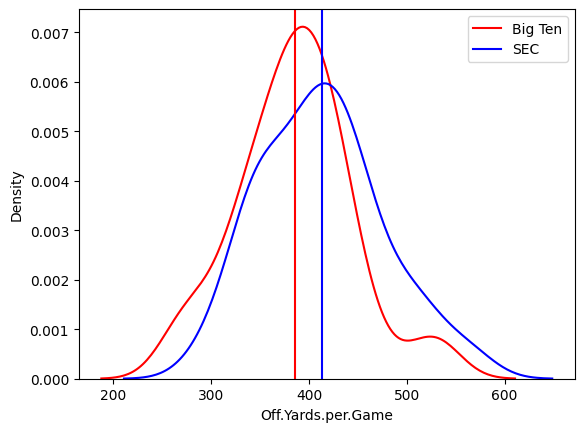

In [6]:
seabornKDEplot_by_conf(allFrame, 'Off.Yards.per.Game')

While the SEC mathematically has a higher mean than the Big Ten conference, statistically, the distributions overlap for the most part and have similar means, so there is no real statistical difference between the means of their offensive yards.



Statistical differences for Off.TDs

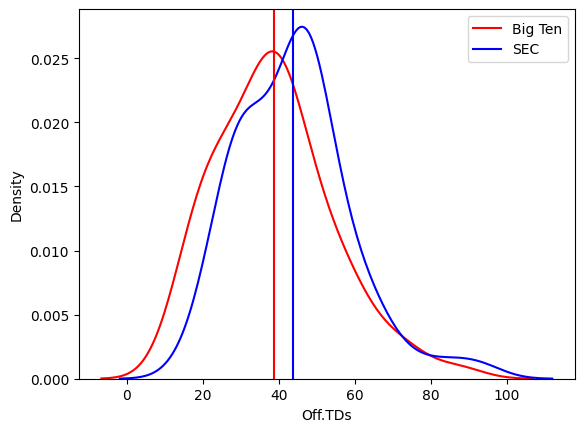

In [7]:
seabornKDEplot_by_conf(allFrame, 'Off.TDs')

While the SEC mathematically has a higher mean than the Big Ten conference, statistically, the distributions overlap for the most part and have similar means, so there is no real statistical difference between the means of their offensive touchdowns.

Offensively, the SEC has higher means than the Big Ten conference for the above criteria, however the data for both conferences overlap for the most part, and there mean values are similar.

###Defense
Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`, `Opp.Pass.Yds.Allowed`, and `Opp.Rush.Yards.Alloweed`? Again, I used a seaborn KDE to analyze these points.



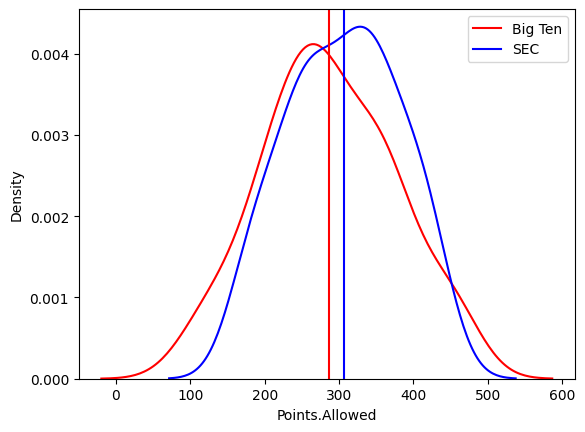

In [8]:
seabornKDEplot_by_conf(allFrame, 'Points.Allowed')

While the SEC mathematically has a higher mean than the Big Ten conference, statistically, the distributions overlap for the most part and have similar means, so there is no real statistical difference between the means of the points that defense allowed.

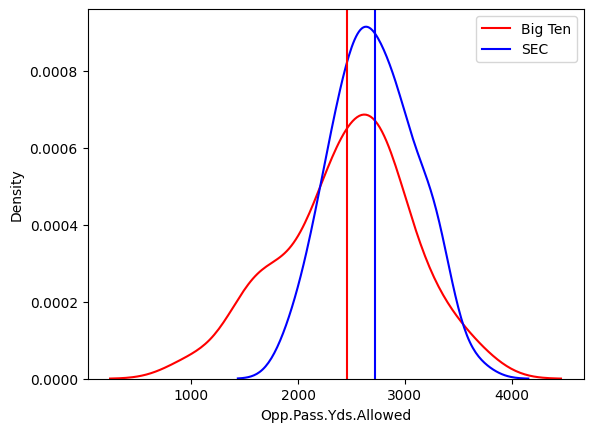

In [9]:
seabornKDEplot_by_conf(allFrame, 'Opp.Pass.Yds.Allowed')

While the SEC mathematically has a higher mean than the Big Ten conference, statistically, the distributions overlap for the most part and have similar means, so there is no real statistical difference between the means of their pass yards.

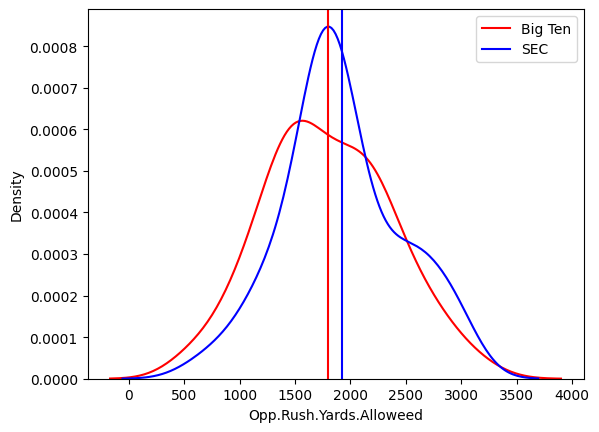

In [10]:
seabornKDEplot_by_conf(allFrame, 'Opp.Rush.Yards.Alloweed')

While the SEC mathematically has a higher mean than the Big Ten conference, statistically, the distributions overlap for the most part and have similar means, so there is no real statistical difference between the means of their rush yards allowed.

The Big Ten conference has lower means than the SEC in terms of points and yards allowed, meaning that defensively, Big Ten conference is technically better, but again, the data overlaps for the most part and the means are quite similar.

##Offense Statistics

Is the offense changing over time? I created plots and variance estimates to analyze this.

 I plotted the following metrics by year:
- `Off.Yards.per.Game`
- `Off.TDs`

In [11]:
def printVar(frame, metric):
  from statistics import variance
  
  data = frame[metric]
  print('Estimated variance: ', variance(data))
  return None

def seabornBoxplot_by_year(frame, metric):
  import seaborn as sns

  func_frame = frame.loc[:,[metric, 'year']]
  sns.boxplot(data = func_frame, x = 'year', y = metric)
  return None

Estimated variance:  3833.49052992227


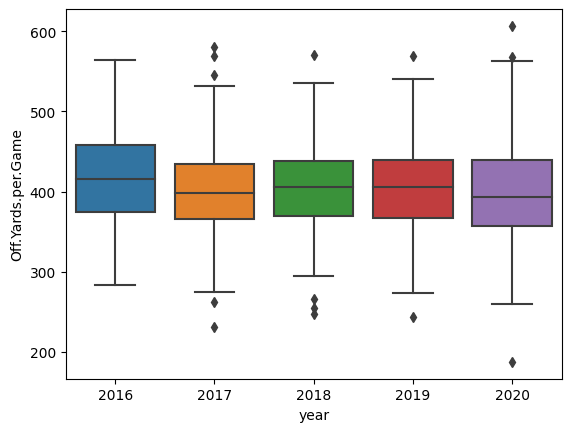

In [12]:
seabornBoxplot_by_year(allFrame, 'Off.Yards.per.Game')
printVar(allFrame, 'Off.Yards.per.Game')

Estimated variance:  216.42180967474152


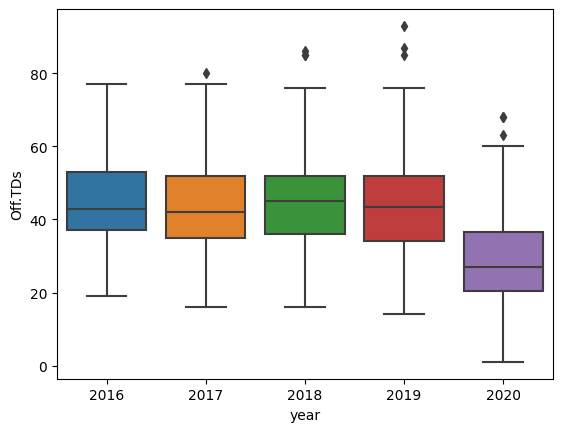

In [13]:
seabornBoxplot_by_year(allFrame, 'Off.TDs')
printVar(allFrame, 'Off.TDs')

The offensive touchdowns per year are about 10% of the offensive yards, with the exception of 2020. This is probably because the COVID-19 pandemic happened in 2020, and shutdown everything. For this reason, fewer games were played and therefore fewer touchdowns could be made.

###Defense Statistics
Is the defense changing over time? I followed the same approach as above to answer this question.

I plotted the following metrics by year:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

Estimated variance:  8407.61164691973


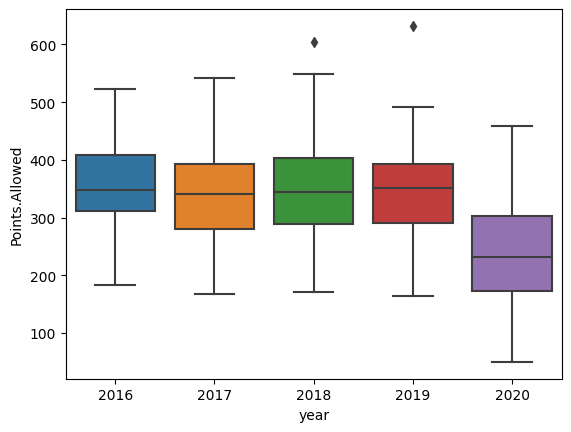

In [14]:
seabornBoxplot_by_year(allFrame, 'Points.Allowed')
printVar(allFrame, 'Points.Allowed')

Estimated variance:  382933.9040122758


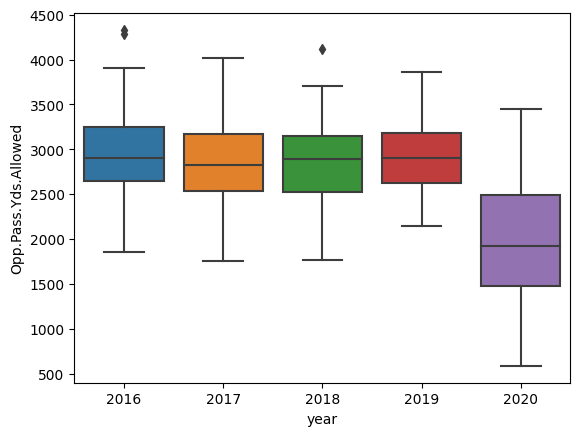

In [15]:
seabornBoxplot_by_year(allFrame, 'Opp.Pass.Yds.Allowed')
printVar(allFrame, 'Opp.Pass.Yds.Allowed')

Estimated variance:  337072.7254244963


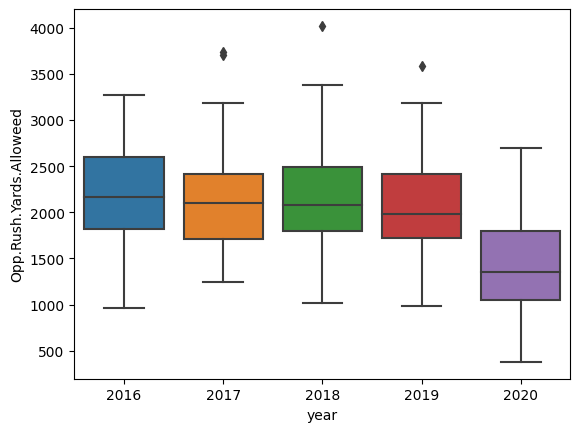

In [16]:
seabornBoxplot_by_year(allFrame, 'Opp.Rush.Yards.Alloweed')
printVar(allFrame, 'Opp.Rush.Yards.Alloweed')

As mentioned above, the COVID-19 pandemic occurred in 2020, leading to fewer football games and fewer data points for these metrics. Outside of this however, the annual amounts for these metrics stays about the same each year. 